# Potok danych

## Eksploracja danych

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, header=None, 
        names= ['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width', 'target'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


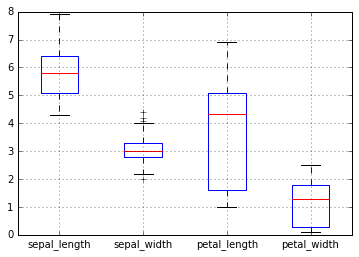

In [4]:
boxes = iris.boxplot(return_type='axes')

In [5]:
iris.quantile([0.1, 0.9])

,sepal_length,sepal_width,petal_length,petal_width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


In [6]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
pd.crosstab(iris['petal_length'] > 3.758667, iris['petal_width'] > 1.198667)

petal_width,False,True
petal_length,,
False,56,1
True,4,89


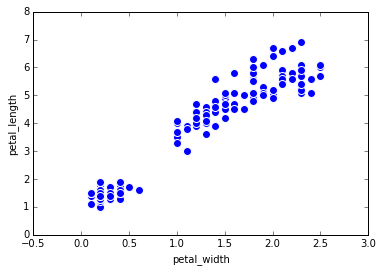

In [8]:
scatterplot = iris.plot(kind='scatter', x='petal_width', y='petal_length', 
                        s=64, c='blue', edgecolors='white')

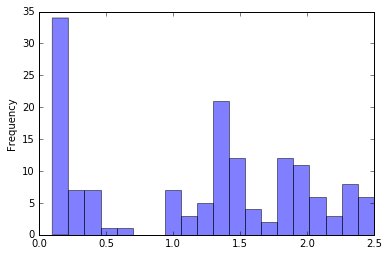

In [9]:
distr = iris.petal_width.plot(kind='hist', alpha=0.5, bins=20)

## Tworzenie cech

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
cali = datasets.california_housing.fetch_california_housing()
X = cali['data']
Y = cali['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, Y_train)
Y_est = regressor.predict(X_test)
print ("MAE=", mean_squared_error(Y_test, Y_est))

MAE= 1.08458007451


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)
Y_est = regressor.predict(X_test_scaled)
print ("MAE=", mean_squared_error(Y_test, Y_est))

MAE= 0.393872387321


In [13]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)
Y_est = regressor.predict(X_test_scaled)
print ("MAE=", mean_squared_error(Y_test, Y_est))

MAE= 0.416917485194


In [14]:
non_linear_feat = 5 # Liczba mieszkańców 
X_train_new_feat = np.sqrt(X_train[:,non_linear_feat])
X_train_new_feat.shape = (X_train_new_feat.shape[0], 1)
X_train_extended = np.hstack([X_train, X_train_new_feat])
X_test_new_feat = np.sqrt(X_test[:,non_linear_feat])
X_test_new_feat.shape = (X_test_new_feat.shape[0], 1)
X_test_extended = np.hstack([X_test, X_test_new_feat])
scaler = StandardScaler()
X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extended_scaled = scaler.transform(X_test_extended)
regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, Y_train)
Y_est = regressor.predict(X_test_extended_scaled)
print ("MAE=", mean_squared_error(Y_test, Y_est))

MAE= 0.344038362599


## Redukcja liczby wymiarów

### Macierz kowariancji

In [15]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print (iris.feature_names)
print (cov_data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


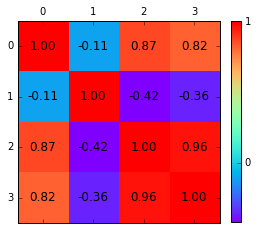

In [16]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], 
                 size=12, color='black', ha="center", va="center")
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150, 2)

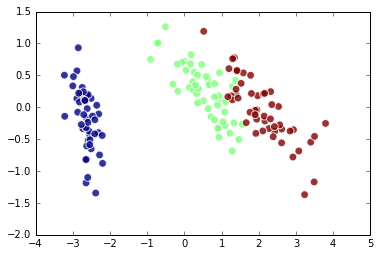

0.97763177502480336

In [18]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=iris.target, alpha=0.8, 
            s=60, marker='o', edgecolors='white')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [19]:
pca_2c.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

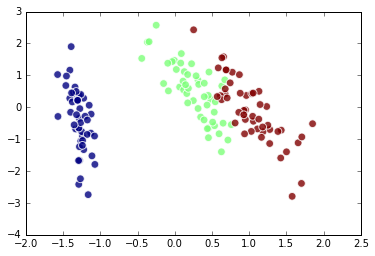

0.97763177502480336

In [20]:
pca_2cw = PCA(n_components=2, whiten=True)
X_pca_1cw = pca_2cw.fit_transform(iris.data)
plt.scatter(X_pca_1cw[:,0], X_pca_1cw[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
pca_2cw.explained_variance_ratio_.sum()

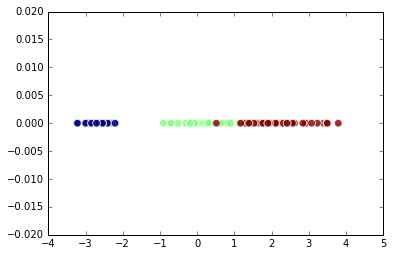

0.9246162071742684

In [21]:
pca_1c = PCA(n_components=1)
X_pca_1c = pca_1c.fit_transform(iris.data)
plt.scatter(X_pca_1c[:,0], np.zeros(X_pca_1c.shape), c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
pca_1c.explained_variance_ratio_.sum()

In [22]:
pca_95pc = PCA(n_components=0.95)
X_pca_95pc = pca_95pc.fit_transform(iris.data)
print (pca_95pc.explained_variance_ratio_.sum())
print (X_pca_95pc.shape)

0.977631775025
(150, 2)


### Wersja algorytmu PCA dla big data: RandomizedPCA

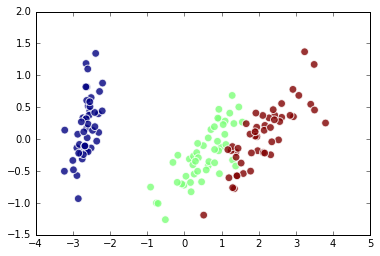

0.97763177502480381

In [23]:
from sklearn.decomposition import RandomizedPCA
rpca_2c = RandomizedPCA(n_components=2)
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
rpca_2c.explained_variance_ratio_.sum()

### Analiza czynników ukrytych

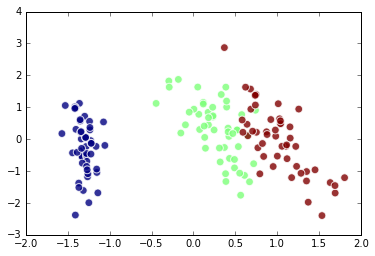

In [24]:
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

### Liniowa analiza dyskryminacyjna (LDA)

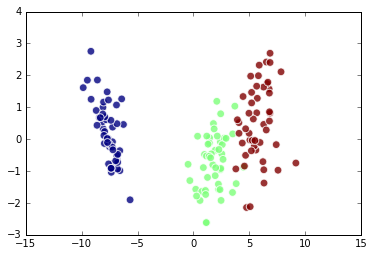

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_2c = LDA(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

### Analiza ukrytych grup semantycznych (LSA)

In [26]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)
from sklearn.decomposition import TruncatedSVD
tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort()[-10:][::-1]]

array(['jupiter', 'sq', 'comet', 'zisfein', 'of', 'gehrels', 'jim', 'gene',
       'omen', 'msb'], 
      dtype='<U79')

### Analiza głównych składowych z funkcją jądra

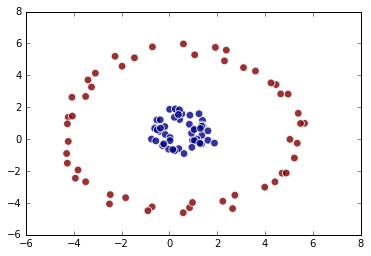

In [27]:
def circular_points (radius, N):
           return np.array([[np.cos(2*np.pi*t/N)*radius, np.sin(2*np.pi*t/N)*radius] for t in range(N)])
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points), circular_points(5.0, N_points)])
fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0]*N_points + [1]*N_points)
plt.scatter(fake_circular_data[:,0], fake_circular_data[:,1], c=fake_circular_target, alpha=0.8, 
            s=60, marker='o', edgecolors='white')
plt.show()

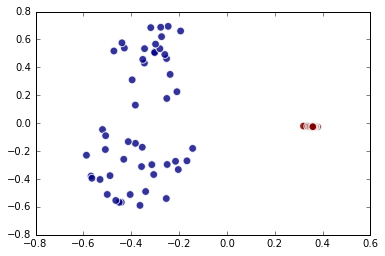

In [28]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

### Algorytm t-SNE

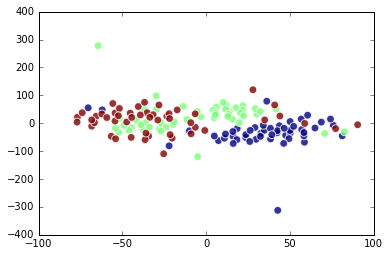

In [29]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

### Ograniczone maszyny Boltzmanna (RBM)

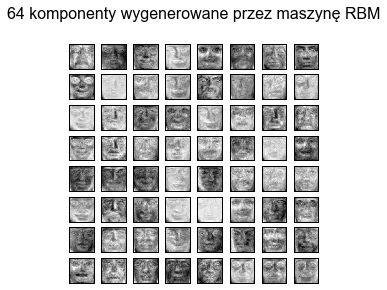

In [31]:
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM
plt.rc('font', family='Arial')
n_components = 64 # Wypróbuj wartości 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()
X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data.astype(float)), 0.5)
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01, n_iter=100)
rbm.fit(X)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)), int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(()); plt.yticks(())
plt.suptitle(str(n_components) + ' komponenty wygenerowane przez maszynę RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

## Wykrywanie i traktowanie wartości odstających

### Techniki jednoczynnikowe

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]

In [33]:
import numpy as np
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
outliers_rows, outliers_columns = np.where(np.abs(normalized_data)>3)

In [34]:
print (len(outliers_rows))
print (outliers_rows)

65
[ 55  56  57 102 141 199 200 201 202 203 204 225 256 257 262 283 284 347
 351 352 353 353 354 355 364 365 367 373 374 374 380 398 404 405 406 410
 410 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429
 431 436 437 438 445 450 454 455 456 457 466]


In [35]:
print (list(zip(outliers_rows, outliers_columns)))

[(55, 1), (56, 1), (57, 1), (102, 10), (141, 11), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (225, 4), (256, 1), (257, 4), (262, 4), (283, 1), (284, 1), (347, 1), (351, 6), (352, 6), (353, 1), (353, 6), (354, 6), (355, 6), (364, 4), (365, 4), (367, 4), (373, 11), (374, 4), (374, 11), (380, 0), (398, 0), (404, 0), (405, 0), (406, 4), (410, 0), (410, 10), (411, 10), (412, 10), (412, 11), (414, 0), (414, 11), (415, 10), (416, 10), (418, 0), (418, 10), (419, 10), (423, 10), (424, 10), (425, 10), (426, 10), (427, 0), (427, 10), (429, 10), (431, 10), (436, 10), (437, 10), (438, 10), (445, 10), (450, 10), (454, 10), (455, 10), (456, 10), (457, 10), (466, 10)]


### Klasa EllipticEnvelope

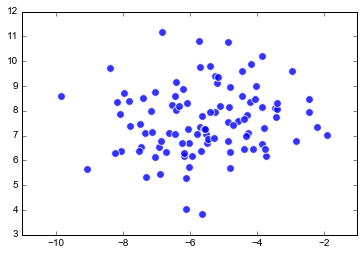

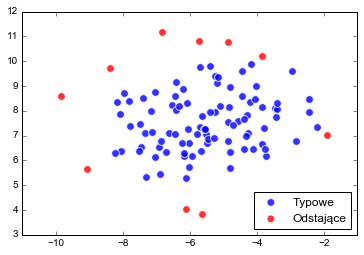

In [36]:
# Generowanie sztucznego rozkładu kropek
from sklearn.datasets import make_blobs
blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs, cluster_std=1.5, shuffle=True, random_state=5)
# Wiarygodne szacowanie kowariancji
from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)[0]
inliers = np.where(detection==1)[0]
# Wyświetlanie rozkładu i wykrytych wartości odstających
from matplotlib import pyplot as plt
# Sam rozkład
plt.scatter(blob[0][:,0],blob[0][:,1], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
# Rozkład i wartości odstające
in_points = plt.scatter(blob[0][inliers,0],blob[0][inliers,1], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(blob[0][outliers,0],blob[0][outliers,1], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('Typowe','Odstające'), scatterpoints=1, loc='lower right')
plt.show() 

In [37]:
from sklearn.decomposition import PCA
# Normalizacja zmiennych ciągłych
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Na potrzeby wizualizacji używane sa dwie pierwsze składowe
# z analizy głównych składowych
pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'Wariancja wyjaśniona ' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

In [38]:
# Szacowanie kowariancji
robust_covariance_est = EllipticEnvelope(store_precision=False, assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_data)
detection = robust_covariance_est.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

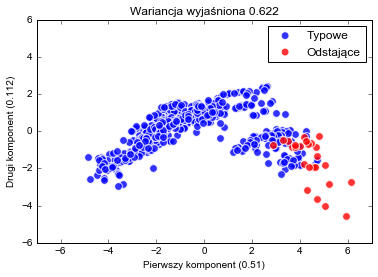

In [40]:
# Wyświetlanie rozkładu i wykrytych wartości odstających
from matplotlib import pyplot as plt
in_points = plt.scatter(Zscore_components[regular,0],Zscore_components[regular,1], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(Zscore_components[outliers,0],Zscore_components[outliers,1], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('Typowe','Odstające'), scatterpoints=1, loc='best')
plt.xlabel('Pierwszy komponent ('+v1+')')
plt.ylabel('Drugi komponent ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.title(vtot)
plt.show()

### Klasa OneClassSVM

In [41]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm
# Normalizacja zmiennych ciągłych
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Na potrzeby wizualizacji wybieranych jest pięć pierwszych komponentów
# z analizy głównych składowych
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'Wariancja wyjaśniona ' + str(round(np.sum(pca.explained_variance_ratio_),3))
# Dopasowywanie i szacunki z użyciem klasy OneClassSVM
outliers_fraction = 0.02
nu_estimate = 0.95 * outliers_fraction + 0.05
machine_learning = svm.OneClassSVM(kernel="rbf", gamma=1.0/len(normalized_data), degree=3, nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

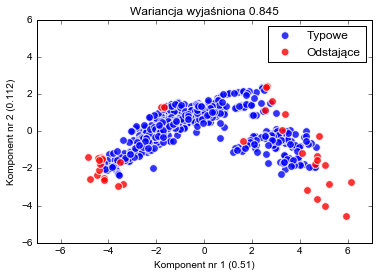

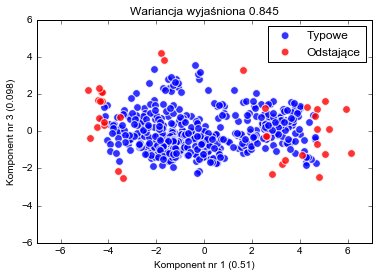

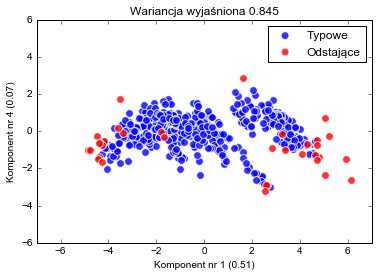

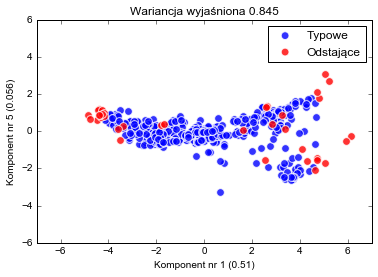

In [42]:
# Wyświetlanie rozkładu i wykrytych wartości odstających
from matplotlib import pyplot as plt
for r in range(1,5):
    in_points = plt.scatter(Zscore_components[regular,0],Zscore_components[regular,r], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
    out_points = plt.scatter(Zscore_components[outliers,0],Zscore_components[outliers,r], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
    plt.legend((in_points,out_points),('Typowe','Odstające'), scatterpoints=1, loc='best')
    plt.xlabel('Komponent nr 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Komponent nr '+str(r+1)+' ('+str(round(pca.explained_variance_ratio_[r],3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.title(vtot)
    plt.show()

## Funkcje używane do walidacji

### Klasyfikacja wieloklasowa

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
# W tym notatniku pomijamy walidację krzyżową
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.50, random_state=4)
# Zastosowanie bardzo słabego klasyfikatora wieloklasowego
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, Y_pred)

In [45]:
print (cm)

[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]


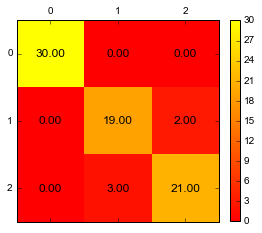

In [46]:
import matplotlib.pyplot as plt
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x, y, "%0.2f" % cm[x,y], 
                 size=12, color='black', ha="center", va="center")
plt.show()

In [48]:
print ("Trafność:", metrics.accuracy_score(Y_test, Y_pred))

Trafność: 0.933333333333


In [49]:
print ("Precyzja:", metrics.precision_score(Y_test, Y_pred, average='weighted'))

Precyzja: 0.93373015873


In [50]:
print ("Czułość:", metrics.recall_score(Y_test, Y_pred, average='weighted'))

Czułość: 0.933333333333


In [51]:
print ("Wskaźnik F1:", metrics.f1_score(Y_test, Y_pred, average='weighted'))

Wskaźnik F1: 0.933267359393


In [52]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        30
 versicolor       0.90      0.86      0.88        22
  virginica       0.88      0.91      0.89        23

avg / total       0.93      0.93      0.93        75



### Regresja

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error([1.0, 0.0, 0.0], [0.0, 0.0, -1.0])

0.66666666666666663

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error([-10.0, 0.0, 0.0], [0.0, 0.0, 0.0])

33.333333333333336

## Testy i walidacja

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.DESCR)
X = digits.data
y = digits.target

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [56]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [57]:
from sklearn import svm
h1 = svm.LinearSVC(C=1.0) # Klasyfikator liniowy
h2 = svm.SVC(kernel='rbf', degree=3, gamma=0.001, C=1.0) # Klasyfikator z radialną funkcją bazową
h3 = svm.SVC(kernel='poly', degree=3, C=1.0) # Klasyfikator wielomianowy trzeciego stopnia

In [58]:
h1.fit(X,y)
print (h1.score(X,y))

0.987200890373


In [59]:
from sklearn import cross_validation

In [61]:
chosen_random_state = 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=chosen_random_state)
print ("(Wymiary zbioru tren. dla X %s, wymiary zbioru test. dla X %s, \nwymiary zbioru tren. dla y %s, wymiary zbioru test. dla y %s" \
% (X_train.shape, X_test.shape, y_train.shape, y_test.shape))
h1.fit(X_train,y_train)
print (h1.score(X_test,y_test)) # Zwraca średnią trafność dla określonych danych testowych i etykiet

(Wymiary zbioru tren. dla X (1257, 64), wymiary zbioru test. dla X (540, 64), 
wymiary zbioru tren. dla y (1257,), wymiary zbioru test. dla y (540,)
0.953703703704


In [62]:
chosen_random_state = 1
X_train, X_validation_test, y_train, y_validation_test = cross_validation.train_test_split(X, y, test_size=.40,
                                                                                           random_state=chosen_random_state)
X_validation, X_test, y_validation, y_test = cross_validation.train_test_split(X_validation_test, y_validation_test, 
                                                                                           test_size=.50, random_state=chosen_random_state)
print ("Wymiary zb. tren. dla X, %s, wymiary zb. walid. dla X %s, wymiary zb. test. dla X %s, \nWymiary zb. tren. dla y %s, wymiary zb. walid. dla y %s, wymiary zb. test. dla y %s\n" % \
       (X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape))
for hypothesis in [h1, h2, h3]:
    hypothesis.fit(X_train,y_train)
    print ("%s -> średnia skuteczność na etapie walidacji = %0.3f" % (hypothesis, hypothesis.score(X_validation,y_validation))  )  
h2.fit(X_train,y_train)
print ("\n%s -> średnia skuteczność na etapie testów = %0.3f" % (h2, h2.score(X_test,y_test)))

Wymiary zb. tren. dla X, (1078, 64), wymiary zb. walid. dla X (359, 64), wymiary zb. test. dla X (360, 64), 
Wymiary zb. tren. dla y (1078,), wymiary zb. walid. dla y (359,), wymiary zb. test. dla y (360,)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) -> średnia skuteczność na etapie walidacji = 0.969
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> średnia skuteczność na etapie walidacji = 0.992
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> średnia skuteczność na et

### Walidacja krzyżowa

In [63]:
choosen_random_state = 1
cv_folds = 10 # Wypróbuj wartości 3, 5 i 20
eval_scoring='accuracy' # Wypróbuj też wartość f1
workers = 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=choosen_random_state)
for hypothesis in [h1, h2, h3]:
    scores = cross_validation.cross_val_score(hypothesis, X_train, y_train, cv=cv_folds, scoring= eval_scoring, n_jobs=workers)
    print ("%s -> trafność w walidacji krzyżowej: średnia = %0.3f odch. st. = %0.3f" % (hypothesis, np.mean(scores), np.std(scores)))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) -> trafność w walidacji krzyżowej: średnia = 0.938 odch. st. = 0.017
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> trafność w walidacji krzyżowej: średnia = 0.990 odch. st. = 0.007
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> trafność w walidacji krzyżowej: średnia = 0.987 odch. st. = 0.010


In [64]:
scores

array([ 0.96899225,  0.96899225,  0.9921875 ,  0.98412698,  0.99206349,
        1.        ,  1.        ,  0.984     ,  0.99186992,  0.98347107])

### Iteratory walidacji krzyżowej

In [65]:
kfolding = cross_validation.KFold(n=100, n_folds=10, shuffle=True, random_state=1)
for train_idx, validation_idx in kfolding:
    print (train_idx, validation_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 70 71 72 73 74 75 76 77 78 79
 83 85 86 87 88 89 90 91 92 94 95 96 97 98 99] [17 33 36 65 69 80 81 82 84 93]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 33 34 35 36 37 38 40 41 42 43 45 46 47 48 49 50 53 54 55 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83
 84 85 86 87 88 89 90 91 93 94 95 96 97 98 99] [10 31 32 39 44 51 52 56 78 92]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 36 37 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 95 96 98 99] [ 2 19 27 35 38 46 62 73 94 97]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26

In [66]:
h1.fit(X[train_idx],y[train_idx])
h1.score(X[validation_idx],y[validation_idx])

0.90000000000000002

### Próbkowanie i bootstrapping

In [67]:
subsampling = cross_validation.ShuffleSplit(n=100, n_iter=10, test_size=0.1, random_state=1)
for train_idx, validation_idx in subsampling:
    print (train_idx, validation_idx)

[92 39 56 52 51 32 31 44 78 10  2 73 97 62 19 35 94 27 46 38 67 99 54 95 88
 40 48 59 23 34 86 53 77 15 83 41 45 91 26 98 43 55 24  4 58 49 21 87  3 74
 30 66 70 42 47 89  8 60  0 90 57 22 61 63  7 96 13 68 85 14 29 28 11 18 20
 50 25  6 71 76  1 16 64 79  5 75  9 72 12 37] [80 84 33 81 93 17 36 82 69 65]
[50  0 29 16 46 61 28 51 31  8 47  4 98 56 78 58  9 83 53 27 67 34 59 97 80
 14 40 19 62 92 25 63 69 49 33 89 37 79 55 88 42 17  5 15 64 48 39 74 66 99
 22 18 41 71 54 86 95 73 60 65 12 32 84 24 81 23 10 13 57 68 45 90 36 30 20
 43 94 93 72 77  7 75 21 91 76  2 70 85 52  6] [44 96  1 35 26 11 38 82 87  3]
[97 63 91 70 43 11 46 94 21 89 61 36 57 90 58  9 12 18 29 16 51 25  6 13 69
 22 88 40 35 56 76 73  0  4 17 59 66 62 98 10 42 65 23 49 75  5 39 68 38 87
 37 81 78  3 72 85 34 60 47 53  7 26 19 14 30 15 44 20 24 64 41 79 50 77 86
 93  8 74 92 31 82 55 28 32 54 48 83 84  2 33] [95 67 96 71  1 80 99 45 52 27]
[ 0  7 92 61 60 15 99 86 72 70 80 50 49 62 65 34  8 75 63 14 57  4 46 21 53
 17

In [68]:
import random
def Bootstrap(n, n_iter=3, random_state=None):
    """
    Generator danych na potrzeby walidacji krzyżowej pobierający losowo próbki z powtórzeniami.
    W każdej iteracji generowany jest zbiór indeksów [0, n) . Funkcja zwraca
    uzyskaną próbkę oraz listę wszystkich pominiętych indeksów.
    """
    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs

boot = Bootstrap(n=100, n_iter=10, random_state=1)
for train_idx, validation_idx in boot:
    print (train_idx, validation_idx)

[17, 72, 97, 8, 32, 15, 63, 97, 57, 60, 83, 48, 26, 12, 62, 3, 49, 55, 77, 97, 98, 0, 89, 57, 34, 92, 29, 75, 13, 40, 3, 2, 3, 83, 69, 1, 48, 87, 27, 54, 92, 3, 67, 28, 97, 56, 63, 70, 29, 44, 29, 86, 28, 97, 58, 37, 2, 53, 71, 82, 12, 23, 80, 92, 37, 15, 95, 42, 92, 91, 64, 54, 64, 85, 24, 38, 36, 75, 63, 64, 50, 75, 4, 61, 31, 95, 51, 53, 85, 22, 46, 70, 89, 99, 86, 94, 47, 11, 56, 84] [5, 6, 7, 9, 10, 14, 16, 18, 19, 20, 21, 25, 30, 33, 35, 39, 41, 43, 45, 52, 59, 65, 66, 68, 73, 74, 76, 78, 79, 81, 88, 90, 93, 96]
[65, 13, 99, 20, 66, 50, 47, 62, 93, 3, 60, 5, 39, 90, 78, 75, 74, 50, 82, 21, 21, 64, 29, 1, 98, 25, 69, 70, 29, 51, 65, 44, 73, 45, 58, 34, 84, 70, 77, 93, 0, 49, 94, 65, 16, 66, 99, 71, 26, 54, 7, 61, 46, 72, 70, 25, 64, 52, 62, 45, 53, 44, 0, 68, 69, 79, 78, 42, 58, 76, 3, 29, 81, 22, 70, 74, 23, 11, 70, 32, 4, 86, 9, 10, 2, 57, 1, 96, 96, 35, 31, 34, 14, 79, 23, 44, 37, 8, 21, 20] [6, 12, 15, 17, 18, 19, 24, 27, 28, 30, 33, 36, 38, 40, 41, 43, 48, 55, 56, 59, 63, 67,

## Optymalizacja hiperparametrów

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [70]:
from sklearn import svm
h = svm.SVC()
hp = svm.SVC(probability=True, random_state=1)

In [71]:
from sklearn import grid_search
search_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
scorer = 'accuracy'

In [72]:
search_func = grid_search.GridSearchCV(estimator=h, param_grid=search_grid, scoring=scorer, n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_)

1 loop, best of 3: 7.3 s per loop
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.981081122784


### Tworzenie niestandardowych funkcji oceny

In [73]:
from sklearn.metrics import log_loss, make_scorer
Log_Loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True) 

In [74]:
search_func = grid_search.GridSearchCV(estimator=hp, param_grid=search_grid, scoring=Log_Loss, n_jobs=-1, iid=False, refit=True, cv=3)
search_func.fit(X,y)
print (search_func.best_score_)
print (search_func.best_params_)

-0.16138394082
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}


In [75]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def my_custom_log_loss_func(ground_truth, p_predictions, penalty = list(), eps=1e-15):
    adj_p = np.clip(p_predictions, eps, 1 - eps)
    lb = LabelBinarizer()
    g = lb.fit_transform(ground_truth)
    if g.shape[1] == 1:
        g = np.append(1 - g, g, axis=1)
    if penalty:
        g[:,penalty] = g[:,penalty] * 2
    summation = np.sum(g * np.log(adj_p))
    return summation * (-1.0/len(ground_truth))

In [76]:
my_custom_scorer = make_scorer(my_custom_log_loss_func, greater_is_better=False, needs_proba=True, penalty = [4,9])

In [77]:
from sklearn import grid_search
search_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
search_func = grid_search.GridSearchCV(estimator=hp, param_grid=search_grid, scoring=my_custom_scorer, n_jobs=1, iid=False, cv=3)
search_func.fit(X,y)
print (search_func.best_score_)
print (search_func.best_params_)

-0.199610271298
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}


### Skracanie czasu przeszukiwania siatki parametrów

In [78]:
search_dict = {'kernel': ['linear','rbf'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
scorer = 'accuracy'
search_func = grid_search.RandomizedSearchCV(estimator=h, param_distributions=search_dict, n_iter=7, scoring=scorer, 
                                          n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_)

1 loop, best of 3: 4.95 s per loop
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
0.981081122784


In [79]:
search_func.grid_scores_

[mean: 0.98108, std: 0.01551, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000},
 mean: 0.97889, std: 0.01788, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1},
 mean: 0.97164, std: 0.02044, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000},
 mean: 0.97164, std: 0.02044, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100},
 mean: 0.96108, std: 0.02191, params: {'kernel': 'linear', 'gamma': 0.001, 'C': 10},
 mean: 0.98108, std: 0.01551, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10},
 mean: 0.96108, std: 0.02191, params: {'kernel': 'linear', 'gamma': 0.001, 'C': 1000}]

## Wybieranie cech

### Wybieranie cech na podstawie wariancji

In [80]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10, n_features=5, n_informative=3, n_redundant=0, random_state=101)

In [81]:
print ("Wariancja:", np.var(X, axis=0))

from sklearn.feature_selection import VarianceThreshold
X_selected = VarianceThreshold(threshold=1.0).fit_transform(X)

print ("Przed:", X[0, :])
print ("Po: ", X_selected[0, :])

Wariancja: [ 2.50852168  1.47239461  0.80912826  1.51763426  1.37205498]
Przed: [ 1.26873317 -1.38447407  0.99257345  1.19224064 -2.07706183]
Po:  [ 1.26873317 -1.38447407  1.19224064 -2.07706183]


### Wybór za pomocą modelu jednoczynnikowego

In [82]:
X, y = make_classification(n_samples=800, n_features=100, n_informative=25, n_redundant=0, random_state=101)

In [83]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import Binarizer, scale
Xbin = Binarizer().fit_transform(scale(X))
# Jeśli używasz metody chi2, parametr X musi być nieujemny (X musi zawierać
# wartości logiczne lub częstotliwości); dlatego po normalizacji
# przeprowadzana jest binaryzacja.
Selector_chi2 = SelectPercentile(chi2, percentile=25).fit(Xbin, y)
Selector_f_classif = SelectPercentile(f_classif, percentile=25).fit(X, y)
chi_scores = Selector_chi2.get_support()
f_classif_scores = Selector_f_classif.get_support()
selected = chi_scores & f_classif_scores # Używanie bitowego operatora and

### Rekurencyjna eliminacja

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)
print ('Trafność dla próbki treningowej: %0.3f' % classifier.score(X_train, y_train))
print ('Trafność dla danych spoza próbki treningowej: %0.3f' % classifier.score(X_test, y_test))

Trafność dla próbki treningowej: 1.000
Trafność dla danych spoza próbki treningowej: 0.667


In [86]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print('Optymalna liczba cech: %d' % selector.n_features_)

Optymalna liczba cech: 4


In [87]:
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print ('Trafność dla danych spoza próbki treningowej: %0.3f' % classifier.score(X_test_s, y_test))

Trafność dla danych spoza próbki treningowej: 0.900


### Wybór na podstawie stabilności i regularyzacji L1

In [6]:
from sklearn.linear_model import LogisticRegression
# Im mniejsze C, tym mniej cech jest wybieranych
classifier = LogisticRegression(C=0.1, penalty='l1', random_state=101) 
classifier.fit(X_train, y_train)
print ('Trafność dla danych spoza próbki treningowej: %0.3f' % classifier.score(X_test, y_test))

Trafność dla danych spoza próbki treningowej: 0.933


In [7]:
from sklearn.linear_model import RandomizedLogisticRegression
selector = RandomizedLogisticRegression(n_resampling=300, random_state=101)
selector.fit(X_train, y_train)
print ('Wybrane zmienne: %i' % sum(selector.get_support()!=0))
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print ('Trafność dla danych spoza próbki treningowej: %0.3f' % classifier.score(X_test_s, y_test))

c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ 

Wybrane zmienne: 3
Trafność dla danych spoza próbki treningowej: 0.933


c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ 

In [86]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=10, n_informative=4, random_state=101) 
rlasso = RandomizedLasso()
rlasso.fit(X, y)

list(enumerate(rlasso.scores_))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Library/Frameworks/Python.framework/Ver

[(0, 1.0),
 (1, 0.0),
 (2, 1.0),
 (3, 0.0),
 (4, 0.0),
 (5, 1.0),
 (6, 0.0),
 (7, 0.0),
 (8, 1.0),
 (9, 0.0)]

## Opakowywanie operacji w potok

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
classifier = LogisticRegression(C=0.1, penalty='l1', random_state=101)

In [11]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import FunctionTransformer

def identity(x):
    return x

def inverse(x):
    return 1.0 / x

parallel = FeatureUnion(transformer_list=[
          ('pca', PCA()),
          ('kernelpca', KernelPCA()),
          ('inverse', FunctionTransformer(inverse)),
          ('original',FunctionTransformer(identity))], n_jobs=1)

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.feature_selection import RFECV
selector = RandomizedLogisticRegression(n_resampling=300, random_state=101, n_jobs=1)

pipeline = Pipeline(steps=[('parallel_transformations', parallel),
                           ('random_selection', selector),
                           ('logistic_reg', classifier)])

In [ ]:
from sklearn import grid_search
search_dict = {'logistic_reg__C':[10,1,0.1], 'logistic_reg__penalty':['l1','l2']}
search_func = grid_search.GridSearchCV(estimator=pipeline, param_grid =search_dict, 
              scoring='accuracy', n_jobs=1, iid=False, refit=True, cv=10)
search_func.fit(X_train,y_train)
print (search_func.best_estimator_)
print (search_func.best_params_)
print (search_func.best_score_)

c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
c:\Users\tomek\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ 

In [14]:
from sklearn.metrics import classification_report
print (classification_report(y_test, search_func.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        17
          1       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        30



## Tworzenie niestandardowych funkcji transformacji

In [94]:
class filtering():
    
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if len(self.columns) == 0:
            return X
        else:
            return X[:,self.columns]

In [95]:
filtering([1,2,3]).transform(X_train)

array([[ 0.78503915,  0.84999568, -0.63974955],
       [-2.4481912 , -0.38522917, -0.14586868],
       [-0.6506899 ,  1.71846072, -1.14010846],
       [-0.81556708, -0.25682591, -2.18292782],
       [-0.03438333, -1.4407462 , -0.37811647],
       [-0.71726529,  0.56010593, -0.26136781],
       [-0.6837591 ,  0.04467348,  1.07771715],
       [ 1.22073304, -0.09901687,  0.67684497],
       [-1.89010973,  0.1461624 ,  0.06334021],
       [-0.23959006, -1.58404719,  0.11306927],
       [ 1.65699119,  1.81465118,  0.21084204],
       [-2.83913072, -1.24860921,  0.36130559],
       [ 0.94014427,  0.76262097,  1.71886638],
       [ 0.23265821,  0.16628331,  0.07499731],
       [-0.81147482,  0.95943077, -0.5360704 ],
       [-0.9878885 , -1.6746724 , -0.39118656],
       [-1.63355906, -2.47076442,  0.77875747],
       [ 0.67231108,  0.66462088,  1.94957894],
       [-2.22166146,  0.85277095, -1.05328018],
       [ 0.64539279, -0.15051502, -0.55973408],
       [-0.64967742,  0.10013977, -0.099